In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("pokemon_data.csv")
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idx             888 non-null    int64 
 1   dex number      888 non-null    int64 
 2   name            888 non-null    object
 3   primary type    888 non-null    object
 4   secondary type  467 non-null    object
 5   ability 1       888 non-null    object
 6   ability 2       407 non-null    object
 7   h ability       700 non-null    object
 8   h2 ability      1 non-null      object
 9   ruleset         888 non-null    object
 10  hp              888 non-null    int64 
 11  atk             888 non-null    int64 
 12  def             888 non-null    int64 
 13  spa             888 non-null    int64 
 14  spd             888 non-null    int64 
 15  spe             888 non-null    int64 
 16  sprite          888 non-null    object
dtypes: int64(8), object(9)
memory usage: 118.1+ KB


,idx,dex number,name,primary type,secondary type,ability 1,ability 2,h ability,h2 ability,ruleset,hp,atk,def,spa,spd,spe,sprite
0,0,985,Scream Tail,Fairy,Psychic,Protosynthesis,NaN,NaN,NaN,NU,115,65,99,65,115,111,sprites_cache/Scream-Tail.gif
1,1,123,Scyther,Bug,Flying,Swarm,Steadfast,Technician,NaN,NU,70,110,80,55,80,105,sprites_cache/Scyther.gif
2,2,117,Seadra,Water,NaN,Poison Point,Damp,Sniper,NaN,NFE,55,65,95,95,45,85,sprites_cache/Seadra.gif
3,3,273,Seedot,Grass,NaN,Chlorophyll,Pickpocket,Early Bird,NaN,LC,40,40,50,30,30,30,sprites_cache/Seedot.gif
4,4,86,Seel,Water,NaN,Thick Fat,Ice Body,Hydration,NaN,LC,65,45,55,45,70,45,sprites_cache/Seel.gif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,883,673,Gogoat,Grass,NaN,Sap Sipper,NaN,Grass Pelt,NaN,ZU,123,100,62,97,81,68,sprites_cache/Gogoat.gif
884,884,55,Golduck,Water,NaN,Damp,Swift Swim,Cloud Nine,NaN,ZU,80,82,78,95,80,85,sprites_cache/Golduck.gif
885,885,76,Golem,Rock,Ground,Rock Head,Sand Veil,Sturdy,NaN,ZU,80,120,130,55,65,45,sprites_cache/Golem.gif
886,886,76,Golem-Alola,Rock,Electric,Magnet Pull,Galvanize,Sturdy,NaN,ZU,80,120,130,55,65,45,sprites_cache/Golem-Alola.gif


In [5]:
# add base stat total calculations
df['bst'] = df[['hp','atk','def','spa','spd','spe']].sum(axis=1)
df

,idx,dex number,name,primary type,secondary type,ability 1,ability 2,h ability,h2 ability,ruleset,hp,atk,def,spa,spd,spe,sprite,bst
0,0,985,Scream Tail,Fairy,Psychic,Protosynthesis,NaN,NaN,NaN,NU,115,65,99,65,115,111,sprites_cache/Scream-Tail.gif,570
1,1,123,Scyther,Bug,Flying,Swarm,Steadfast,Technician,NaN,NU,70,110,80,55,80,105,sprites_cache/Scyther.gif,500
2,2,117,Seadra,Water,NaN,Poison Point,Damp,Sniper,NaN,NFE,55,65,95,95,45,85,sprites_cache/Seadra.gif,440
3,3,273,Seedot,Grass,NaN,Chlorophyll,Pickpocket,Early Bird,NaN,LC,40,40,50,30,30,30,sprites_cache/Seedot.gif,220
4,4,86,Seel,Water,NaN,Thick Fat,Ice Body,Hydration,NaN,LC,65,45,55,45,70,45,sprites_cache/Seel.gif,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,883,673,Gogoat,Grass,NaN,Sap Sipper,NaN,Grass Pelt,NaN,ZU,123,100,62,97,81,68,sprites_cache/Gogoat.gif,531
884,884,55,Golduck,Water,NaN,Damp,Swift Swim,Cloud Nine,NaN,ZU,80,82,78,95,80,85,sprites_cache/Golduck.gif,500
885,885,76,Golem,Rock,Ground,Rock Head,Sand Veil,Sturdy,NaN,ZU,80,120,130,55,65,45,sprites_cache/Golem.gif,495
886,886,76,Golem-Alola,Rock,Electric,Magnet Pull,Galvanize,Sturdy,NaN,ZU,80,120,130,55,65,45,sprites_cache/Golem-Alola.gif,495


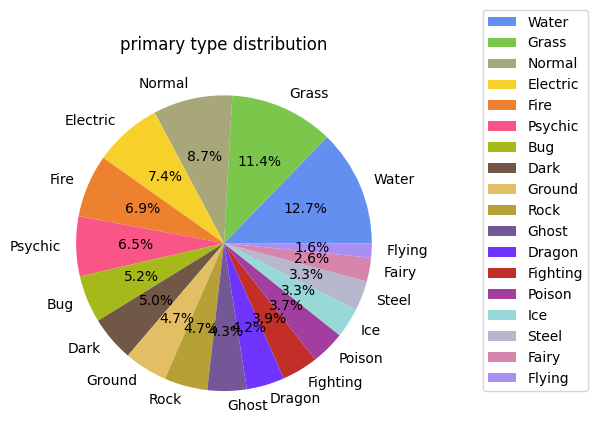

In [12]:
# primary type distribution
type_colors = {'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Grass': '#7AC74C',
    'Electric': '#F7D02C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD',
    'no type': '#F5F5DC'}
    
counts = df['primary type'].value_counts()
list_of_types = counts.index.tolist()
custom_colors = [type_colors[t] for t in list_of_types]

plt.pie(counts, labels=counts.index.tolist(), colors=custom_colors, autopct='%1.1f%%')
plt.ylabel("")
plt.title("primary type distribution")
plt.legend(labels=counts.index.tolist(), loc = [1.2, 0.1])
plt.show()

In [13]:
# secondary type distribution
df['secondary type'] = df['secondary type'].fillna("no type")
counts = df['secondary type'].value_counts()
print(counts)
list_of_types = counts.index.tolist()
custom_colors = [type_colors[t] for t in list_of_types]

plt.pie(counts, labels=counts.index.tolist(), colors=custom_colors, autopct='%1.1f%%')
plt.ylabel("")
plt.title("Secondary type distribution")
plt.legend(labels=counts.index.tolist(), loc = [1.2, 0.1])
plt.show()

secondary type
no secondary    421
Flying           82
Psychic          36
Poison           35
Fighting         33
Dragon           31
Fairy            30
Ghost            29
Steel            28
Ground           27
Dark             26
Fire             19
Ice              19
Grass            18
Water            15
Normal           13
Electric         11
Rock             11
Bug               4
Name: count, dtype: int64


KeyError: 'no secondary'